In [36]:
import nidaqmx, numpy as np
with nidaqmx.Task() as ai_task, nidaqmx.Task() as ao_task:
    rate = 10**4 # sample rate in Hz
    duration = 5 # acquisition duration in seconds 
    npnts = int(rate * duration)
    ai_task.ai_channels.add_ai_voltage_chan(physical_channel='/Dev2/ai0', min_val=-10.0, max_val=10.0)
    ai_task.ai_channels.add_ai_voltage_chan(physical_channel='/Dev2/ai1',  min_val=-10.0, max_val=10.0)
    ao_task.ao_channels.add_ao_voltage_chan('/Dev2/ao0')
    ao_task.timing.cfg_samp_clk_timing(rate,
                                     sample_mode=nidaqmx.constants.AcquisitionType.FINITE,
                                     samps_per_chan=npnts)
    ai_task.timing.cfg_samp_clk_timing(rate, 
                                       sample_mode=nidaqmx.constants.AcquisitionType.FINITE,
                                       samps_per_chan=npnts)
    
    ao_task.write(np.linspace(0, 10, npnts), auto_start=False)
    ao_task.start()
    ai_task.start()
    
    ai_task.wait_until_done()
    ao_task.wait_until_done()
    
    data = ai_task.read(number_of_samples_per_channel=npnts)

In [2]:
# DAQ code WIP
import PyDAQmx as nidaq, numpy as np, time
from scipy import signal
runlength = 20
fs = 1000
nchans = 2
t = np.linspace(0, runlength, runlength*fs, endpoint=False)
stim = signal.square(2 * np.pi * t)
t1 = nidaq.Task()
t1.CreateAIVoltageChan("Dev2/ai0", None, nidaq.DAQmx_Val_Diff, -10, 10, nidaq.DAQmx_Val_Volts, None) # Whisker stim IN
t1.CreateAIVoltageChan("Dev2/ai1", None, nidaq.DAQmx_Val_Diff, -10, 10, nidaq.DAQmx_Val_Volts, None) # LED Strobe
t2 = nidaq.Task()
t2.CreateAOVoltageChan("Dev2/ao1", None, -10, 10, nidaq.DAQmx_Val_Volts, None) # Whisker stim OUT
t1.CfgSampClkTiming("", fs, nidaq.DAQmx_Val_Rising, nidaq.DAQmx_Val_FiniteSamps, fs*runlength*nchans)
t2.CfgSampClkTiming("", fs, nidaq.DAQmx_Val_Rising, nidaq.DAQmx_Val_FiniteSamps, fs*runlength*nchans)
#t2.WriteAnalogScalarF64(1,10.0,1,None)

t1.StartTask()
t2.StartTask()
print(time.time())
t2.WriteAnalogF64(len(stim),0,10.0,0,stim,None,None)
print(time.time())


NonBufferedAndHWTimedError: Non-buffered hardware-timed operations are not supported for this device and Channel Type.

Set the Buffer Size to greater than 0, do not configure Sample Clock timing, or set Sample Timing Type to On Demand.
Task Name: _unnamedTask<1>

Status Code: -201025
 in function DAQmxStartTask

In [1]:
import numpy as np
data = np.zeros((fs*runlength*nchans), dtype=np.float64)
read = nidaq.int32()
t1.ReadAnalogF64(fs*runlength, 5, nidaq.DAQmx_Val_GroupByChannel,
   data, len(data)*nchans, nidaq.byref(read), None)

NameError: name 'fs' is not defined

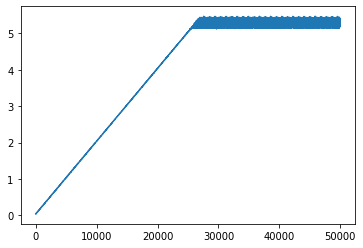

In [37]:
# Plot AI channels
DAQdata = np.asarray(data)
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(DAQdata[0,:])
plt.show()

In [18]:
sio.savemat(filename+'_DAQ.mat', {'DAQdata': DAQdata})

In [29]:
nidaqmx.constants.DEFAULT

-1